In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

In [62]:
m = 300 # number of training examples
X, y = make_moons(m, noise=0.1)
n = X.shape[1]

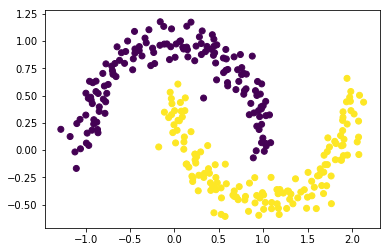

In [63]:
plt.scatter(X[:,0],X[:,1],c=y)

In [64]:
y.shape

(300,)

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
def sigmoid_der(z):
    return sigmoid(z)*(1-sigmoid(z))

In [36]:
sigmoid = np.vectorize(sigmoid)
sigmoid_der = np.vectorize(sigmoid_der)

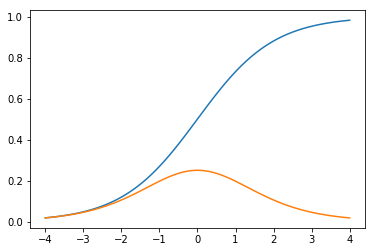

In [57]:
x_s = np.linspace(-4,4,100)
y_s = sigmoid(x)
y_s_prime = sigmoid_der(x)


plt.plot(x_s,y_s)
plt.plot(x_s,y_s_prime)

In [231]:
W1 = np.random.randn(n,n)
b1 = np.random.randn(n,1)

print(W1)
print(b1)

[[-0.17018919  0.07075443]
 [ 1.1637866   1.11061938]]
[[ 1.37880983]
 [-0.54189451]]


In [232]:
W2 = np.random.randn(n,n)
b2 = np.random.randn(n,1)

print(W2)
print(b2)

[[-1.60498353  0.64314847]
 [-0.90185756  0.75309493]]
[[1.14356979]
 [1.13248415]]


In [233]:
W3 = np.random.randn(n,1)
b3 = np.random.randn(1,1)

print(W3)
print(b3)

[[ 1.45604459]
 [-0.20552479]]
[[1.61621469]]


In [262]:
r = 0.0001

In [263]:
for epoch in range(100):
    if epoch % 10 == 0:
        error = 0
    for i in range(m):
        u1 = np.dot(W1.T,X[i].T).reshape(n,1) + b1
        y1 = sigmoid(u1)
        u2 = np.dot(W2.T, y1).reshape(n,1) + b2
        y2 = sigmoid(u2)
        u3 = np.dot(W3.T, y2) + b3
        y3 = sigmoid(u3)

        e = y[i] - y3
        if epoch % 10 == 0:
            error += e**2

        delta3 = e * sigmoid_der(u3)
        delta2 = sigmoid_der(u2).reshape(n,1) * np.dot(W3,delta3).reshape(n,1)
        delta1 = sigmoid_der(u1).reshape(n,1) * np.dot(W2,delta2).reshape(n,1)

        y2 = y2.reshape(n,1)
        y1 = y1.reshape(n,1)

        dW3 = np.dot(y2,delta3.T).reshape(n,1)
        dW2 = np.dot(y1,delta2.T)
        dW1 = np.dot(X[0].reshape(n,1),delta1.T)

        W1 += r * dW1
        b1 += r * delta1
        W2 += r * dW2
        b2 += r * delta2
        W3 += r * dW3
        b3 += r * delta3
        
    if epoch % 10 == 0:
        error = error / m
        print("epoch =", epoch, "MSE =", error)

epoch = 0 MSE = [[0.08059455]]
epoch = 10 MSE = [[0.08059409]]
epoch = 20 MSE = [[0.08059398]]
epoch = 30 MSE = [[0.08059396]]
epoch = 40 MSE = [[0.08059393]]
epoch = 50 MSE = [[0.08059383]]
epoch = 60 MSE = [[0.08059364]]
epoch = 70 MSE = [[0.08059338]]
epoch = 80 MSE = [[0.08059305]]
epoch = 90 MSE = [[0.08059266]]


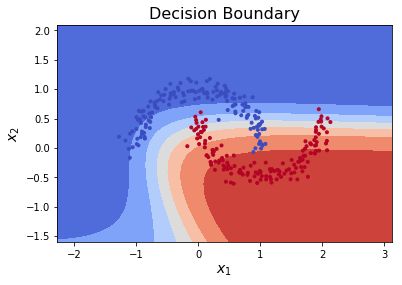

In [264]:
h = 0.1
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Zx = np.c_[xx.ravel(), yy.ravel()]

# here "model" is the model's prediction (classification) function
u1 = np.dot(W1.T,Zx.T).reshape(n,Zx.shape[0]) + b1
y1 = sigmoid(u1)
u2 = np.dot(W2.T, y1).reshape(n,Zx.shape[0]) + b2
y2 = sigmoid(u2)
u3 = np.dot(W3.T, y2) + b3
y3 = sigmoid(u3)
Z = y3

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="coolwarm")
# plt.axis('off')

# Plot the training points
plt.scatter(X[:,0], X[:,1], marker='.', c=y,  cmap="coolwarm")

plt.title("Decision Boundary", fontsize=16)
plt.xlabel("$x_{1}$", fontsize=14)
plt.ylabel("$x_{2}$", fontsize=14)
plt.show()